## Modules - updated to get all info

In [1]:
'''THIS FILE HAS CODE TO INTRACT WITH THE CONTRACT'''
import web3
from eth_account import Account
import requests

class Contract:
    def __init__(self, contractAddress="0xCF205808Ed36593aa40a44F10c7f7C2F67d4A4d4", BASE_MAINNET="https://developer-access-mainnet.base.org/", privateKey=None):
        self.CONTRACT_ADDRESS = contractAddress
        self.PRIVATE_KEY = privateKey
        self.BASE_MAINNET = BASE_MAINNET

    # READ FUNCTIONS
    def getBuyPrice(self, address, amount):
        '''returns buy price of shares in wei'''

        checkSumAddress = web3.Web3.to_checksum_address(address)
        w3 = web3.Web3(web3.HTTPProvider(self.BASE_MAINNET))
        contractABI = open("/Users/xiaofanjiao/Desktop/friend.tech/Package/friendtech/contractABI.json", "r").read()
        contract = w3.eth.contract(
            address=self.CONTRACT_ADDRESS, abi=contractABI)
        buyPrice = contract.functions.getBuyPrice(
            w3.to_checksum_address(checkSumAddress), amount).call()
        return buyPrice

    def getBuyPriceAfterFee(self, address, amount):
        '''returns buy price of a share after fees in wei'''

        checkSumAddress = web3.Web3.to_checksum_address(address)
        w3 = web3.Web3(web3.HTTPProvider(self.BASE_MAINNET))
        contractABI = open("/Users/xiaofanjiao/Desktop/friend.tech/Package/friendtech/contractABI.json", "r").read()
        contract = w3.eth.contract(
            address=self.CONTRACT_ADDRESS, abi=contractABI)
        buyPiceAfterFee = contract.functions.getBuyPriceAfterFee(
            w3.to_checksum_address(checkSumAddress), amount).call()
        return buyPiceAfterFee

    def getSellPrice(self, address, amount):
        '''returns sell price'''
        checkSumAddress = web3.Web3.to_checksum_address(address)
        w3 = web3.Web3(web3.HTTPProvider(self.BASE_MAINNET))
        contractABI = open("/Users/xiaofanjiao/Desktop/friend.tech/Package/friendtech/contractABI.json", "r").read()
        contract = w3.eth.contract(
            address=self.CONTRACT_ADDRESS, abi=contractABI)
        sellPrice = contract.functions.getSellPrice(
            w3.to_checksum_address(checkSumAddress), amount).call()
        return sellPrice

    def getSellPriceAfterFee(self, address, amount):
        '''returns sell price after fee'''
        checkSumAddress = web3.Web3.to_checksum_address(address)
        w3 = web3.Web3(web3.HTTPProvider(self.BASE_MAINNET))
        contractABI = open("/Users/xiaofanjiao/Desktop/friend.tech/Package/friendtech/contractABI.json", "r").read()
        contract = w3.eth.contract(
            address=self.CONTRACT_ADDRESS, abi=contractABI)
        sellPriceAfterFee = contract.functions.getSellPriceAfterFee(
            w3.to_checksum_address(checkSumAddress), amount).call()
        return sellPriceAfterFee

    def getSharesSupply(self, address):
        '''returns supply of share of given address'''
        checkSumAddress = web3.Web3.to_checksum_address(address)
        w3 = web3.Web3(web3.HTTPProvider(self.BASE_MAINNET))
        contractABI = open("/Users/xiaofanjiao/Desktop/friend.tech/Package/friendtech/contractABI.json", "r").read()
        contract = w3.eth.contract(
            address=self.CONTRACT_ADDRESS, abi=contractABI)
        sharesSupply = contract.functions.sharesSupply(
            w3.to_checksum_address(checkSumAddress)).call()
        return sharesSupply

    def getSharesOwned(self, address, subjectAddress):
        '''returns how many shares of subjectAdderss the address owns'''
        checkSumAddress = web3.Web3.to_checksum_address(address)
        checkSumSubjectAddress = web3.Web3.to_checksum_address(subjectAddress)
        w3 = web3.Web3(web3.HTTPProvider(self.BASE_MAINNET))
        contractABI = open("/Users/xiaofanjiao/Desktop/friend.tech/Package/friendtech/contractABI.json", "r").read()
        contract = w3.eth.contract(
            address=self.CONTRACT_ADDRESS, abi=contractABI)
        sharesOwned = contract.functions.sharesBalance(
            checkSumSubjectAddress, checkSumAddress).call()
        return sharesOwned

    # BETA FUNCTIONS. NOT THOROUGLY TESTED. USE AT YOUR OWN RISK
    def buyShares(self, addressToBuy, payableAmount,  shareCount=1):
        addressToBuyCheckSum = web3.Web3.to_checksum_address(addressToBuy)
        userAccount = Account.from_key(self.PRIVATE_KEY)
        userAddressCheckSum = w3.to_checksum_address(userAccount.address)
        w3 = web3.Web3(web3.HTTPProvider(self.BASE_MAINNET))
        contractABI = open("/Users/xiaofanjiao/Desktop/friend.tech/Package/friendtech/contractABI.json", "r").read()
        chainID = w3.eth.chain_id
        nonce = w3.eth.get_transaction_count(userAddressCheckSum)
        contract = w3.eth.contract(
            address=self.CONTRACT_ADDRESS, abi=contractABI)

        callFunction = contract.functions.buyShares(addressToBuyCheckSum, shareCount).buildTransaction({
            "value": payableAmount,
            "chainId": chainID,
            "from": userAddressCheckSum,
            "nonce": nonce
        })

        signedTransaction = w3.eth.account.sign_transaction(
            callFunction, private_key=self.PRIVATE_KEY)

        sendTransaction = w3.eth.send_raw_transaction(
            signedTransaction.rawTransaction)

        transactionReceipt = w3.eth.wait_for_transaction_receipt(
            sendTransaction)
        return transactionReceipt

    def sellShares(self, addressToSell, shareCount=1):
        addressToBuyCheckSum = web3.Web3.to_checksum_address(addressToSell)
        userAccount = Account.from_key(self.PRIVATE_KEY)
        userAddressCheckSum = w3.to_checksum_address(userAccount.address)
        w3 = web3.Web3(web3.HTTPProvider(self.BASE_MAINNET))
        contractABI = open("/Users/xiaofanjiao/Desktop/friend.tech/Package/friendtech/contractABI.json", "r").read()
        chainID = w3.eth.chain_id
        nonce = w3.eth.get_transaction_count(userAddressCheckSum)
        contract = w3.eth.contract(
            address=self.CONTRACT_ADDRESS, abi=contractABI)

        callFunction = contract.functions.sellShares(addressToBuyCheckSum, shareCount).buildTransaction({
            "value": 0,
            "chainId": chainID,
            "from": userAddressCheckSum,
            "nonce": nonce
        })

        signedTransaction = w3.eth.account.sign_transaction(
            callFunction, private_key=self.PRIVATE_KEY)

        sendTransaction = w3.eth.send_raw_transaction(
            signedTransaction.rawTransaction)

        transactionReceipt = w3.eth.wait_for_transaction_receipt(
            sendTransaction)
        return transactionReceipt
    

class Platform:
    def __init__(self, jwt="", backendURL="https://prod-api.kosetto.com", heders={
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 \
        (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',

        
    }):
        self.BACKEND_URL = backendURL
        self.HEADERS = heders
        self.JWT = jwt

    def getRecentlyJoinedUsers(self):
        '''Returns Response object with list of recently joined users'''

        url = f'{self.BACKEND_URL}/lists/recently-joined'
        response = requests.get(url, headers=self.HEADERS)
        return response

    def getGlobalActivity(self):
        '''Returns Response object with list of all recent share trades on the platform'''
        url = f'{self.BACKEND_URL}/global-activity'
        response = requests.get(url, headers=self.HEADERS)
        return response

    def getAddressFromTwitterUsername(self, username):
        '''Returns base address of the user'''
        newHeader = self.HEADERS
        newHeader['Authorization'] = self.JWT
        url = f'{self.BACKEND_URL}/search/users?username={username}'
        print(newHeader)
        response = requests.get(url, headers=newHeader)
        return response

    def getInfoFromAddress(self, address):
        '''Returns user info from address'''
        url = f'{self.BACKEND_URL}/users/{address}'
        response = requests.get(url, headers=self.HEADERS)
        return response

    def getInfoFromUserID(self, userID):
        '''Returns info from userID of friendtech user.'''
        url = f'{self.BACKEND_URL}/users/by-id/{userID}'
        response = requests.get(url, headers=self.HEADERS)
        return response

    # def getHolders(self, address):
    #     '''returns token holder of an address'''
    #     url = f'{self.BACKEND_URL}/users/{address}/token/holders'
    #     response = requests.get(url, headers=self.HEADERS)
    #     return response
    
    def getHolders(self, address):
        
        all_holders = []
        page_start = 0
        
        while True:
            params = {'pageStart': page_start}
            url = f'{self.BACKEND_URL}/users/{address}/token/holders'
            response = requests.get(url, headers=self.HEADERS, params=params)
            data = response.json()
            
            holders = data.get('users', [])
            if not holders:
                break
            
            all_holders.extend(holders)
            
            # If there are fewer than 50 holders in the response, we're done
            if len(holders) < 50:
                break
            
            # Increment the page start for the next request
            page_start += 50
        
        return all_holders
    
    def getHoldings(self, address):
        '''returns token holdings of an address'''
        url = f'{self.BACKEND_URL}/users/{address}/token-holdings'
        response = requests.get(url, headers=self.HEADERS)
        return response


### Testing API

#### Getting buy price of a share

In [2]:

# contract = Contract()
# buyPrice = contract.getBuyPrice("0xeab1e59d08e927ec19c9249f4841395bc4af43b8", 1)

# print(buyPrice)

#### Getting buy price after fee of a share

In [3]:
# contract = Contract()
# buyPrice = contract.getBuyPriceAfterFee("0xeab1e59d08e927ec19c9249f4841395bc4af43b8", 1)
# print(buyPrice)

#### Getting sell price of a share

In [4]:
# contract = Contract()
# sellPrice = contract.getSellPrice("0xeab1e59d08e927ec19c9249f4841395bc4af43b8", 1)
# print(sellPrice)

#### Getting sell price after fee of a share

In [5]:
# contract = Contract()
# sellPrice = contract.getSellPriceAfterFee("0xeab1e59d08e927ec19c9249f4841395bc4af43b8", 1)
# print(sellPrice)

#### Getting shares supply


In [6]:
# contract = Contract()
# shareSupply = contract.getSharesSupply("0xeab1e59d08e927ec19c9249f4841395bc4af43b8")
# print(shareSupply)

# Merge

In [7]:
# import pandas as pd
# import matplotlib.pyplot as plt

In [8]:
# user_data = pd.read_csv('all_platform_users.csv')
# user_data

# Retrive Dataset

In [9]:
# contract = Contract()

# # Ensure the 'address' column is of type string and handle NaN values
# user_data['address'] = user_data['address'].astype(str)

# # Function to get prices, with error handling for invalid addresses
# def get_prices(address):
#     try:
#         buy_price = contract.getBuyPrice(address, 1)
#         buy_price_after_fee = contract.getBuyPriceAfterFee(address, 1)
#         sell_price = contract.getSellPrice(address, 1)
#         sell_price_after_fee = contract.getSellPriceAfterFee(address, 1)
#         return buy_price, buy_price_after_fee, sell_price, sell_price_after_fee
#     except Exception as e:
#         # Handle the exception (e.g., log it, return None, etc.)
#         print(f"Error processing address {address}: {e}")
#         return None, None, None, None

# # Loop through unique addresses and store the results
# unique_addresses = user_data['address'].unique()

# # Create lists to store the results
# buy_prices = []
# buy_prices_after_fee = []
# sell_prices = []
# sell_prices_after_fee = []

# for address in unique_addresses:
#     buy_price, buy_price_after_fee, sell_price, sell_price_after_fee = get_prices(address)
#     buy_prices.append(buy_price)
#     buy_prices_after_fee.append(buy_price_after_fee)
#     sell_prices.append(sell_price)
#     sell_prices_after_fee.append(sell_price_after_fee)

# # Create a DataFrame with the results
# price_data = pd.DataFrame({
#     'address': unique_addresses,
#     'buy_price': buy_prices,
#     'buy_price_after_fee': buy_prices_after_fee,
#     'sell_price': sell_prices,
#     'sell_price_after_fee': sell_prices_after_fee
# })

# # Merge the results back into the original DataFrame
# user_data_added = user_data.merge(price_data, on='address', how='left')
# user_data_added

In [10]:
# user_data_added.to_csv('Financials.csv', index=False)

In [11]:
# user_data_added.columns

# User Analysis

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
# pd.options.display.float_format = '{:.20f}'.format

In [13]:
user_data_added = pd.read_csv('Financials.csv')
user_data_added

,id,address,twitterUsername,twitterName,twitterPfpUrl,twitterUserId,ftUsername,ftName,ftPfpUrl,lastOnline,...,message,owner_address,owner_twitter_username,balance,isFollowing,has_keys,buy_price,buy_price_after_fee,sell_price,sell_price_after_fee
0,903.0,0x4e5f7e4a774bd30b9bdca7eb84ce3681a71676e1,cobie,cobie,https://d3egfmvgqzu76k.cloudfront.net/twitterP...,2.259435e+09,cobie,cobie,https://d3egfmvgqzu76k.cloudfront.net/twitterP...,1.721802e+12,...,NaN,NaN,NaN,NaN,NaN,NaN,540562500000000000,567590625000000000,529000000000000000,502550000000000000
1,301.0,0xe9825fd47c5d863b1aecba3707abcc7c8b49b88d,blknoiz06,Z 🧸,https://d3egfmvgqzu76k.cloudfront.net/twitterP...,9.732615e+08,blknoiz06,Z 🧸,https://d3egfmvgqzu76k.cloudfront.net/twitterP...,1.721831e+12,...,NaN,NaN,NaN,NaN,NaN,NaN,552250000000000000,579862500000000000,540562500000000000,513534375000000000
2,11.0,0xfd7232e66a69e1ae01e1e0ea8fab4776e2d325a9,0xRacerAlt,Racer,https://d3egfmvgqzu76k.cloudfront.net/twitterP...,1.455020e+18,0xRacerAlt,Racer,https://d3egfmvgqzu76k.cloudfront.net/pfp-imag...,1.721685e+12,...,NaN,NaN,NaN,NaN,NaN,NaN,410062500000000000,430565625000000000,400000000000000000,380000000000000000
3,11601.0,0xef42b587e4a3d33f88fa499be1d80c676ff7a226,HsakaTrades,Hsaka,https://pbs.twimg.com/profile_images/169092991...,9.446862e+17,HsakaTrades,Hsaka,https://pbs.twimg.com/profile_images/169092991...,1.716347e+12,...,NaN,NaN,NaN,NaN,NaN,NaN,506250000000000000,531562500000000000,495062500000000000,470309375000000000
4,154776.0,0x87484f87ffe65440715f3fd77dc67553ede7e3e5,KyleSamani,Integrated Kyle,https://pbs.twimg.com/profile_images/160088841...,4.633244e+07,KyleSamani,Integrated Kyle,https://pbs.twimg.com/profile_images/160088841...,1.715514e+12,...,NaN,NaN,NaN,NaN,NaN,NaN,64000000000000000,67200000000000000,60062500000000000,57059375000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5169,8712.0,0x0bea4cd44b98baed7b4e4c01cd5d4855128d29f9,traveler0x,Traveler0x,https://pbs.twimg.com/profile_images/167733280...,1.301529e+18,traveler0x,Traveler0x,https://pbs.twimg.com/profile_images/167733280...,1.691761e+12,...,NaN,0x64352eaaadeaca3f1b6d81711caba2ce6b46feeb,elonmusk,1.0,False,1.0,250000000000000,262500000000000,62500000000000,59375000000000
5170,103643.0,0x1ba2977b542ce6eff6f8c09ebfb87c1151a0ce11,257KMH,Kæ I Am,https://pbs.twimg.com/profile_images/144984318...,1.449843e+18,257KMH,Kæ I Am,https://pbs.twimg.com/profile_images/144984318...,0.000000e+00,...,NaN,0x64352eaaadeaca3f1b6d81711caba2ce6b46feeb,elonmusk,1.0,False,1.0,250000000000000,262500000000000,62500000000000,59375000000000
5171,128005.0,0x3977febe1884ceb348347dd1bd269fb382382b6b,JCPLEASEHELPY,Steven Jobawitz,https://abs.twimg.com/sticky/default_profile_i...,8.939664e+17,JCPLEASEHELPY,Steven Jobawitz,https://d3egfmvgqzu76k.cloudfront.net/https://...,0.000000e+00,...,NaN,0x64352eaaadeaca3f1b6d81711caba2ce6b46feeb,elonmusk,1.0,False,1.0,250000000000000,262500000000000,62500000000000,59375000000000
5172,4887.0,0x5f07922add90ec89ed89b69040e45aa2e98a905f,airdropkvlyn,airdrop avcısı,https://abs.twimg.com/sticky/default_profile_i...,1.638301e+18,airdropkvlyn,airdrop avcısı,https://d3egfmvgqzu76k.cloudfront.net/https://...,1.691749e+12,...,NaN,0x64352eaaadeaca3f1b6d81711caba2ce6b46feeb,elonmusk,1.0,False,1.0,250000000000000,262500000000000,62500000000000,59375000000000


In [14]:
user_data_added['shareSupply'].dropna()

0       97.0
1       94.0
2       81.0
3       90.0
4       32.0
        ... 
5113    15.0
5114    14.0
5115     2.0
5116     6.0
5117    12.0
Name: shareSupply, Length: 5118, dtype: float64

In [15]:
financials_df = user_data_added.copy()

# Convert price columns to ETH
financials_df['buy_price_eth'] = financials_df['buy_price'] / 10**18
financials_df['buy_price_after_fee_eth'] = financials_df['buy_price_after_fee'] / 10**18
financials_df['sell_price_eth'] = financials_df['sell_price'] / 10**18
financials_df['sell_price_after_fee_eth'] = financials_df['sell_price_after_fee'] / 10**18

financials_df['displayPrice'] = financials_df['displayPrice'] / 10**18
financials_df['displayPrice']

0       0.540562
1       0.552250
2       0.410062
3       0.506250
4       0.064000
          ...   
5169         NaN
5170         NaN
5171         NaN
5172         NaN
5173         NaN
Name: displayPrice, Length: 5174, dtype: float64

In [16]:
financials_df

,id,address,twitterUsername,twitterName,twitterPfpUrl,twitterUserId,ftUsername,ftName,ftPfpUrl,lastOnline,...,isFollowing,has_keys,buy_price,buy_price_after_fee,sell_price,sell_price_after_fee,buy_price_eth,buy_price_after_fee_eth,sell_price_eth,sell_price_after_fee_eth
0,903.0,0x4e5f7e4a774bd30b9bdca7eb84ce3681a71676e1,cobie,cobie,https://d3egfmvgqzu76k.cloudfront.net/twitterP...,2.259435e+09,cobie,cobie,https://d3egfmvgqzu76k.cloudfront.net/twitterP...,1.721802e+12,...,NaN,NaN,540562500000000000,567590625000000000,529000000000000000,502550000000000000,0.540562,0.567591,0.529000,0.502550
1,301.0,0xe9825fd47c5d863b1aecba3707abcc7c8b49b88d,blknoiz06,Z 🧸,https://d3egfmvgqzu76k.cloudfront.net/twitterP...,9.732615e+08,blknoiz06,Z 🧸,https://d3egfmvgqzu76k.cloudfront.net/twitterP...,1.721831e+12,...,NaN,NaN,552250000000000000,579862500000000000,540562500000000000,513534375000000000,0.552250,0.579862,0.540562,0.513534
2,11.0,0xfd7232e66a69e1ae01e1e0ea8fab4776e2d325a9,0xRacerAlt,Racer,https://d3egfmvgqzu76k.cloudfront.net/twitterP...,1.455020e+18,0xRacerAlt,Racer,https://d3egfmvgqzu76k.cloudfront.net/pfp-imag...,1.721685e+12,...,NaN,NaN,410062500000000000,430565625000000000,400000000000000000,380000000000000000,0.410062,0.430566,0.400000,0.380000
3,11601.0,0xef42b587e4a3d33f88fa499be1d80c676ff7a226,HsakaTrades,Hsaka,https://pbs.twimg.com/profile_images/169092991...,9.446862e+17,HsakaTrades,Hsaka,https://pbs.twimg.com/profile_images/169092991...,1.716347e+12,...,NaN,NaN,506250000000000000,531562500000000000,495062500000000000,470309375000000000,0.506250,0.531563,0.495063,0.470309
4,154776.0,0x87484f87ffe65440715f3fd77dc67553ede7e3e5,KyleSamani,Integrated Kyle,https://pbs.twimg.com/profile_images/160088841...,4.633244e+07,KyleSamani,Integrated Kyle,https://pbs.twimg.com/profile_images/160088841...,1.715514e+12,...,NaN,NaN,64000000000000000,67200000000000000,60062500000000000,57059375000000000,0.064000,0.067200,0.060062,0.057059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5169,8712.0,0x0bea4cd44b98baed7b4e4c01cd5d4855128d29f9,traveler0x,Traveler0x,https://pbs.twimg.com/profile_images/167733280...,1.301529e+18,traveler0x,Traveler0x,https://pbs.twimg.com/profile_images/167733280...,1.691761e+12,...,False,1.0,250000000000000,262500000000000,62500000000000,59375000000000,0.000250,0.000262,0.000063,0.000059
5170,103643.0,0x1ba2977b542ce6eff6f8c09ebfb87c1151a0ce11,257KMH,Kæ I Am,https://pbs.twimg.com/profile_images/144984318...,1.449843e+18,257KMH,Kæ I Am,https://pbs.twimg.com/profile_images/144984318...,0.000000e+00,...,False,1.0,250000000000000,262500000000000,62500000000000,59375000000000,0.000250,0.000262,0.000063,0.000059
5171,128005.0,0x3977febe1884ceb348347dd1bd269fb382382b6b,JCPLEASEHELPY,Steven Jobawitz,https://abs.twimg.com/sticky/default_profile_i...,8.939664e+17,JCPLEASEHELPY,Steven Jobawitz,https://d3egfmvgqzu76k.cloudfront.net/https://...,0.000000e+00,...,False,1.0,250000000000000,262500000000000,62500000000000,59375000000000,0.000250,0.000262,0.000063,0.000059
5172,4887.0,0x5f07922add90ec89ed89b69040e45aa2e98a905f,airdropkvlyn,airdrop avcısı,https://abs.twimg.com/sticky/default_profile_i...,1.638301e+18,airdropkvlyn,airdrop avcısı,https://d3egfmvgqzu76k.cloudfront.net/https://...,1.691749e+12,...,False,1.0,250000000000000,262500000000000,62500000000000,59375000000000,0.000250,0.000262,0.000063,0.000059


<Axes: >

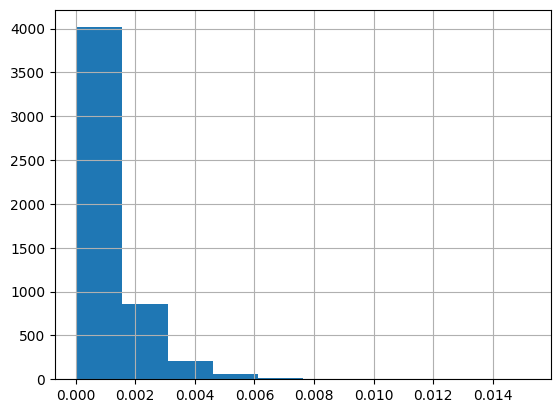

In [17]:
financials_df['spread_eth'] = financials_df['buy_price_eth'] - financials_df['sell_price_eth']
financials_df.spread_eth.hist()

In [18]:
financials_df.columns

Index(['id', 'address', 'twitterUsername', 'twitterName', 'twitterPfpUrl',
       'twitterUserId', 'ftUsername', 'ftName', 'ftPfpUrl', 'lastOnline',
       'lastMessageTime', 'holderCount', 'holdingCount', 'watchlistCount',
       'followerCount', 'followingCount', 'shareSupply', 'displayPrice',
       'netBuy', 'lifetimeFeesCollectedInWei', 'userBio', 'rank', 'message',
       'owner_address', 'owner_twitter_username', 'balance', 'isFollowing',
       'has_keys', 'buy_price', 'buy_price_after_fee', 'sell_price',
       'sell_price_after_fee', 'buy_price_eth', 'buy_price_after_fee_eth',
       'sell_price_eth', 'sell_price_after_fee_eth', 'spread_eth'],
      dtype='object')

In [19]:
financials_df[['id', 'address', 'twitterUsername', 'ftName', 'lastOnline', 
               'holderCount',  'holdingCount', 'watchlistCount', 'followerCount', 
               'followingCount', 'displayPrice', 'buy_price', 'buy_price_after_fee', 
               'sell_price', 'sell_price_after_fee', 'buy_price_eth', 
               'buy_price_after_fee_eth',  'sell_price_eth', 'sell_price_after_fee_eth' ]]

,id,address,twitterUsername,ftName,lastOnline,holderCount,holdingCount,watchlistCount,followerCount,followingCount,displayPrice,buy_price,buy_price_after_fee,sell_price,sell_price_after_fee,buy_price_eth,buy_price_after_fee_eth,sell_price_eth,sell_price_after_fee_eth
0,903.0,0x4e5f7e4a774bd30b9bdca7eb84ce3681a71676e1,cobie,cobie,1.721802e+12,81.0,2.0,6002.0,6002.0,15.0,0.540562,540562500000000000,567590625000000000,529000000000000000,502550000000000000,0.540562,0.567591,0.529000,0.502550
1,301.0,0xe9825fd47c5d863b1aecba3707abcc7c8b49b88d,blknoiz06,Z 🧸,1.721831e+12,87.0,310.0,69732.0,69732.0,345.0,0.552250,552250000000000000,579862500000000000,540562500000000000,513534375000000000,0.552250,0.579862,0.540562,0.513534
2,11.0,0xfd7232e66a69e1ae01e1e0ea8fab4776e2d325a9,0xRacerAlt,Racer,1.721685e+12,69.0,76.0,21143.0,21143.0,212.0,0.410062,410062500000000000,430565625000000000,400000000000000000,380000000000000000,0.410062,0.430566,0.400000,0.380000
3,11601.0,0xef42b587e4a3d33f88fa499be1d80c676ff7a226,HsakaTrades,Hsaka,1.716347e+12,75.0,248.0,46715.0,46715.0,299.0,0.506250,506250000000000000,531562500000000000,495062500000000000,470309375000000000,0.506250,0.531563,0.495063,0.470309
4,154776.0,0x87484f87ffe65440715f3fd77dc67553ede7e3e5,KyleSamani,Integrated Kyle,1.715514e+12,21.0,13.0,120.0,120.0,13.0,0.064000,64000000000000000,67200000000000000,60062500000000000,57059375000000000,0.064000,0.067200,0.060062,0.057059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5169,8712.0,0x0bea4cd44b98baed7b4e4c01cd5d4855128d29f9,traveler0x,Traveler0x,1.691761e+12,NaN,NaN,NaN,NaN,NaN,NaN,250000000000000,262500000000000,62500000000000,59375000000000,0.000250,0.000262,0.000063,0.000059
5170,103643.0,0x1ba2977b542ce6eff6f8c09ebfb87c1151a0ce11,257KMH,Kæ I Am,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,250000000000000,262500000000000,62500000000000,59375000000000,0.000250,0.000262,0.000063,0.000059
5171,128005.0,0x3977febe1884ceb348347dd1bd269fb382382b6b,JCPLEASEHELPY,Steven Jobawitz,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,250000000000000,262500000000000,62500000000000,59375000000000,0.000250,0.000262,0.000063,0.000059
5172,4887.0,0x5f07922add90ec89ed89b69040e45aa2e98a905f,airdropkvlyn,airdrop avcısı,1.691749e+12,NaN,NaN,NaN,NaN,NaN,NaN,250000000000000,262500000000000,62500000000000,59375000000000,0.000250,0.000262,0.000063,0.000059


In [20]:
financials_df['displayPrice'].dropna()

0       0.540562
1       0.552250
2       0.410062
3       0.506250
4       0.064000
          ...   
5113    0.014063
5114    0.012250
5115    0.000250
5116    0.002250
5117    0.009000
Name: displayPrice, Length: 5118, dtype: float64

#  Market Activity Analysis

#### 1. Descriptive Statistics
Summary statistics for buying and selling prices.
Distribution of buy and sell prices.

In [21]:
# Descriptive statistics for buying and selling prices
descriptive_stats = financials_df[['buy_price_eth', 'sell_price_eth', 'buy_price_after_fee_eth', 'sell_price_after_fee_eth']].describe()
descriptive_stats

,buy_price_eth,sell_price_eth,buy_price_after_fee_eth,sell_price_after_fee_eth
count,5174.000000,5174.000000,5174.000000,5174.000000
mean,0.011328,0.010156,0.011894,0.009648
std,0.031897,0.030923,0.033491,0.029377
min,0.000063,0.000000,0.000066,0.000000
25%,0.001000,0.000562,0.001050,0.000534
50%,0.003063,0.002250,0.003216,0.002138
75%,0.010563,0.009000,0.011091,0.008550
max,0.930250,0.915063,0.976762,0.869309


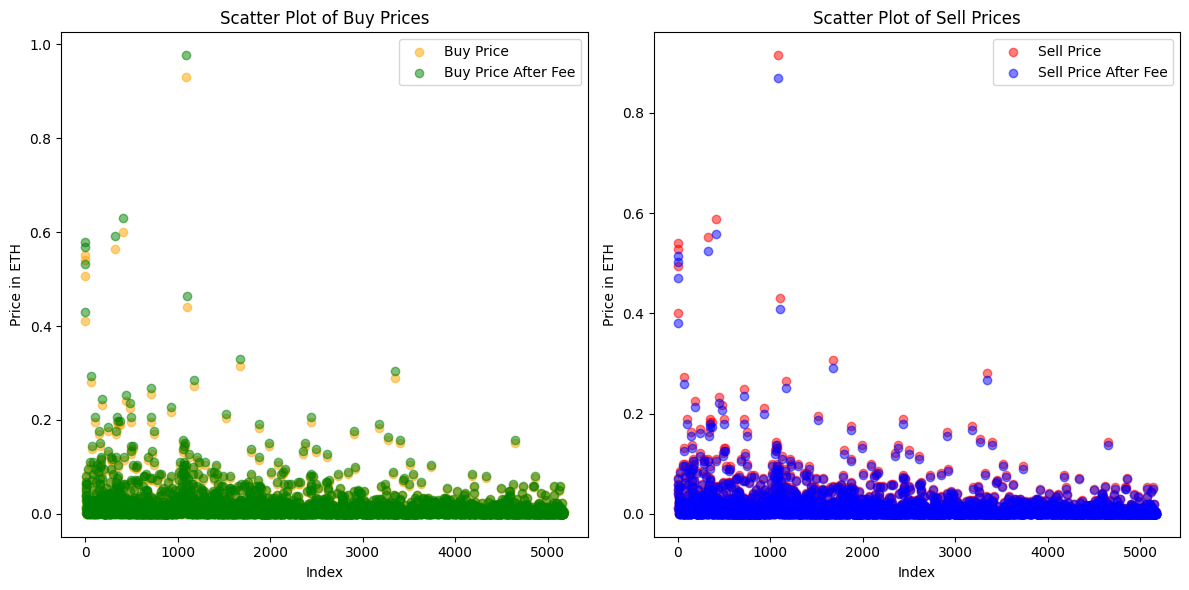

In [22]:
# Scatter plot for distribution of buy and sell prices
plt.figure(figsize=(12, 6))

# Scatter plot for Buy prices distribution
plt.subplot(1, 2, 1)
plt.title('Scatter Plot of Buy Prices')
plt.scatter(financials_df.index, financials_df['buy_price_eth'], alpha=0.5, label='Buy Price', color='orange')
plt.scatter(financials_df.index, financials_df['buy_price_after_fee_eth'], alpha=0.5, label='Buy Price After Fee', color='green')
plt.legend(loc='upper right')
plt.xlabel('Index')
plt.ylabel('Price in ETH')

# Scatter plot for Sell prices distribution
plt.subplot(1, 2, 2)
plt.title('Scatter Plot of Sell Prices')
plt.scatter(financials_df.index, financials_df['sell_price_eth'], alpha=0.5, label='Sell Price', color='red')
plt.scatter(financials_df.index, financials_df['sell_price_after_fee_eth'], alpha=0.5, label='Sell Price After Fee', color='blue')
plt.legend(loc='upper right')
plt.xlabel('Index')
plt.ylabel('Price in ETH')

plt.tight_layout()
plt.show()


Mean:
Buy Price: 0.0113 ETH
Sell Price: 0.0102 ETH
Buy Price After Fee: 0.0119 ETH
Sell Price After Fee: 0.0096 ETH
Standard Deviation (std): The standard deviations are relatively high compared to the means, indicating a wide range of prices.
Minimum (min) and Maximum (max): Prices range from very low values (close to 0) to significantly higher values, showing a diverse set of transactions.
Percentiles (25%): The 25th percentile values provide insights into the lower quartile of the prices.
Distribution of Buy and Sell Prices:
The histograms show the distribution of buy and sell prices, both before and after fees.
The distributions indicate that most buy and sell transactions occur at lower price points, with a few transactions at higher prices.

#### 2. User Activity
Analysis of user activity based on lastOnline timestamps.
Comparison of user activity with buying and selling behavior.

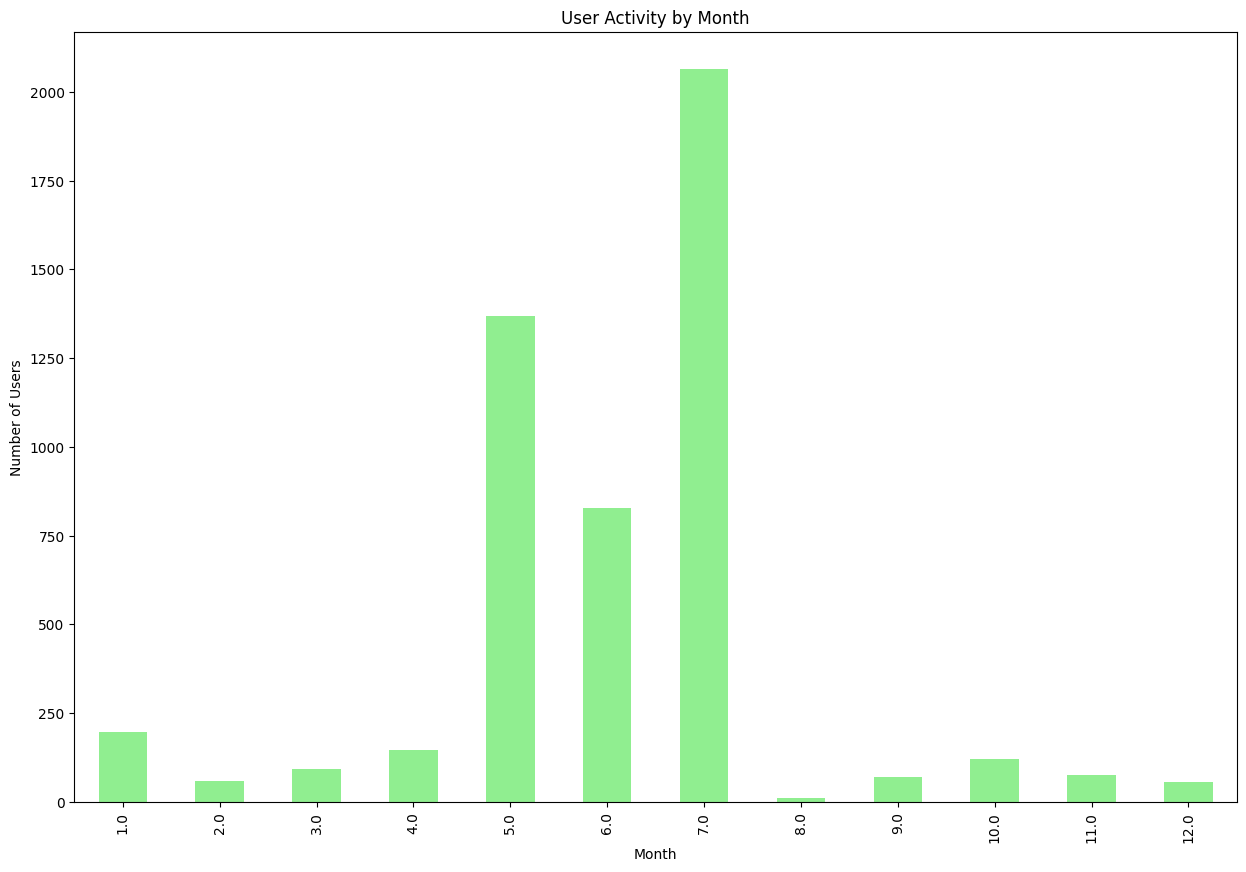

In [23]:
# Convert 'lastOnline' to a datetime format
financials_df['lastOnline'] = pd.to_datetime(financials_df['lastOnline'], unit='ms')

# Extract year, month, and day for analysis
financials_df['lastOnline_month'] = financials_df['lastOnline'].dt.month

# Plot the user activity based on 'lastOnline' timestamps
plt.figure(figsize=(15, 10))
financials_df['lastOnline_month'].value_counts().sort_index().plot(kind='bar', color='lightgreen')
plt.title('User Activity by Month')
plt.xlabel('Month')
plt.ylabel('Number of Users')


plt.show()


This makes sense cuz we are bsed on their last time online and now is July so we see more users are active this month. 

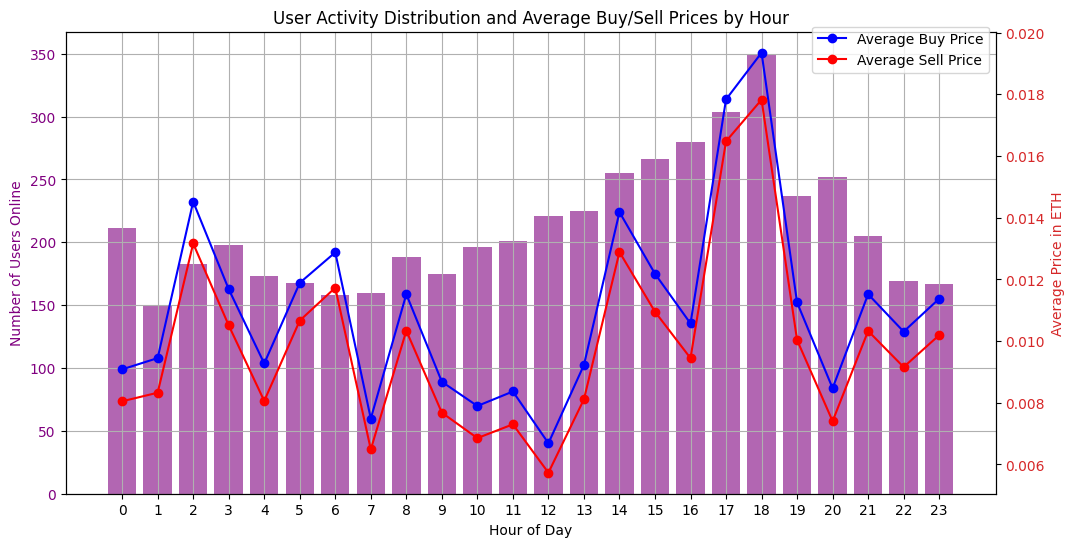

In [24]:
# Parsing 'lastOnline' as datetime
financials_df['lastOnline'] = pd.to_datetime(financials_df['lastOnline'])

# Analyzing user activity based on lastOnline timestamps
last_online_distribution = financials_df['lastOnline'].dt.hour.value_counts().sort_index()

# Comparing user activity with buying and selling behavior
# Grouping by hour and calculating average buy and sell prices
financials_df['hour'] = financials_df['lastOnline'].dt.hour
hourly_activity = financials_df.groupby('hour').agg(
    avg_buy_price=('buy_price_eth', 'mean'),
    avg_sell_price=('sell_price_eth', 'mean')
).reset_index()

# Plotting the combined plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting the histogram for user activity distribution
color = 'purple'
ax1.set_title('User Activity Distribution and Average Buy/Sell Prices by Hour')
ax1.set_xlabel('Hour of Day')
ax1.set_ylabel('Number of Users Online', color=color)
ax1.bar(last_online_distribution.index, last_online_distribution.values, color=color, alpha=0.6)
ax1.tick_params(axis='y', labelcolor=color)

# Creating a second y-axis for the average buy/sell prices
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Average Price in ETH', color=color)
ax2.plot(hourly_activity['hour'], hourly_activity['avg_buy_price'], label='Average Buy Price', color='blue', marker='o')
ax2.plot(hourly_activity['hour'], hourly_activity['avg_sell_price'], label='Average Sell Price', color='red', marker='o')
ax2.tick_params(axis='y', labelcolor=color)

# Adding legends
fig.legend(loc='upper right', bbox_to_anchor=(0.9, 0.9))

# Ensuring all hours are represented on the x-axis
ax1.set_xticks(range(24))

# Adding a grid
ax1.grid(True)

# Display the plot
plt.show()


#### 3.  Total Expected Return

In [25]:
financials_df['displayPrice']

0       0.540562
1       0.552250
2       0.410062
3       0.506250
4       0.064000
          ...   
5169         NaN
5170         NaN
5171         NaN
5172         NaN
5173         NaN
Name: displayPrice, Length: 5174, dtype: float64

In [26]:
# Calculate the total expected return
financials_df['total_expected_return'] = financials_df['shareSupply'].dropna() * financials_df['displayPrice'].dropna()
financials_df['total_expected_return']


0       52.434562
1       51.911500
2       33.215063
3       45.562500
4        2.048000
          ...    
5169          NaN
5170          NaN
5171          NaN
5172          NaN
5173          NaN
Name: total_expected_return, Length: 5174, dtype: float64

In [27]:
# Calculate summary statistics
summary_stats = financials_df['total_expected_return'].dropna().describe()
summary_stats

count    5118.000000
mean        0.365808
std         2.622965
min         0.000063
25%         0.004000
50%         0.021438
75%         0.137313
max       113.490500
Name: total_expected_return, dtype: float64

In [28]:
# Identify the top 10 entries with the highest total expected returns
top_performers = financials_df.nlargest(10, 'total_expected_return')

top_performers


,id,address,twitterUsername,twitterName,twitterPfpUrl,twitterUserId,ftUsername,ftName,ftPfpUrl,lastOnline,...,sell_price,sell_price_after_fee,buy_price_eth,buy_price_after_fee_eth,sell_price_eth,sell_price_after_fee_eth,spread_eth,lastOnline_month,hour,total_expected_return
1089,125567.0,0xd8e1d8f932e7b50644e5a4c94e2fcf65a1aa25b9,valdeande,🦷VM,https://d3egfmvgqzu76k.cloudfront.net/twitterP...,3.032150e+07,valdeande,🦷VM,https://d3egfmvgqzu76k.cloudfront.net/twitterP...,2024-07-24 17:05:49.536999936,...,915062500000000000,869309375000000000,0.930250,0.976762,0.915063,0.869309,0.015188,7.0,17.0,113.490500
412,139997.0,0x6a955d6d6cfaefbb7b2f1bf59e2552ac4a18d0d9,CL207,CL,https://d3egfmvgqzu76k.cloudfront.net/twitterP...,1.073133e+18,CL207,CL,https://d3egfmvgqzu76k.cloudfront.net/twitterP...,2024-06-12 18:57:52.199000064,...,588062500000000000,558659375000000000,0.600250,0.630262,0.588063,0.558659,0.012187,6.0,18.0,58.824500
326,34791.0,0x3c2c38a354f72d0d5cd1ac4b77bf7b0d86d0f80a,Cryptoyieldinfo,Cryptoyieldinfo,https://d3egfmvgqzu76k.cloudfront.net/twitterP...,1.241562e+18,Cryptoyieldinfo,Cryptoyieldinfo,https://d3egfmvgqzu76k.cloudfront.net/twitterP...,2024-07-24 17:27:01.276000000,...,552250000000000000,524637500000000000,0.564063,0.592266,0.552250,0.524637,0.011813,7.0,17.0,53.585938
0,903.0,0x4e5f7e4a774bd30b9bdca7eb84ce3681a71676e1,cobie,cobie,https://d3egfmvgqzu76k.cloudfront.net/twitterP...,2.259435e+09,cobie,cobie,https://d3egfmvgqzu76k.cloudfront.net/twitterP...,2024-07-24 06:23:22.960999936,...,529000000000000000,502550000000000000,0.540562,0.567591,0.529000,0.502550,0.011562,7.0,6.0,52.434562
1,301.0,0xe9825fd47c5d863b1aecba3707abcc7c8b49b88d,blknoiz06,Z 🧸,https://d3egfmvgqzu76k.cloudfront.net/twitterP...,9.732615e+08,blknoiz06,Z 🧸,https://d3egfmvgqzu76k.cloudfront.net/twitterP...,2024-07-24 14:30:58.072999936,...,540562500000000000,513534375000000000,0.552250,0.579862,0.540562,0.513534,0.011688,7.0,14.0,51.911500
3,11601.0,0xef42b587e4a3d33f88fa499be1d80c676ff7a226,HsakaTrades,Hsaka,https://pbs.twimg.com/profile_images/169092991...,9.446862e+17,HsakaTrades,Hsaka,https://pbs.twimg.com/profile_images/169092991...,2024-05-22 03:10:28.384999936,...,495062500000000000,470309375000000000,0.506250,0.531563,0.495063,0.470309,0.011187,5.0,3.0,45.562500
1106,44185.0,0xd431a1666f9ce076c184a3d7dd1d07fad2df44b2,buyingyourstops,"BUYINGYOURSTOPS (zz,zz)",https://d3egfmvgqzu76k.cloudfront.net/twitterP...,9.513514e+17,buyingyourstops,"BUYINGYOURSTOPS (zz,zz)",https://d3egfmvgqzu76k.cloudfront.net/twitterP...,2024-07-21 23:46:39.436999936,...,430562500000000000,409034375000000000,0.441000,0.463050,0.430563,0.409034,0.010437,7.0,23.0,37.044000
2,11.0,0xfd7232e66a69e1ae01e1e0ea8fab4776e2d325a9,0xRacerAlt,Racer,https://d3egfmvgqzu76k.cloudfront.net/twitterP...,1.455020e+18,0xRacerAlt,Racer,https://d3egfmvgqzu76k.cloudfront.net/pfp-imag...,2024-07-22 21:52:03.927000064,...,400000000000000000,380000000000000000,0.410062,0.430566,0.400000,0.380000,0.010062,7.0,21.0,33.215063
1677,234631.0,0x316af439161dcfb730e8a22868de767c3e97d261,GarlamWON,Garlam,https://d3egfmvgqzu76k.cloudfront.net/twitterP...,8.324300e+17,Point,Garlam,https://d3egfmvgqzu76k.cloudfront.net/twitterP...,2024-07-19 19:31:39.416000000,...,306250000000000000,290937500000000000,0.315063,0.330816,0.306250,0.290938,0.008813,7.0,19.0,22.369438
3350,11730.0,0x41ef6e28c2a8651249bebfb0322bde2e68183160,RowdyCrypto,R💫WDY,https://d3egfmvgqzu76k.cloudfront.net/twitterP...,1.297084e+18,Rowdy,R💫WDY,https://d3egfmvgqzu76k.cloudfront.net/twitterP...,2024-07-24 17:37:53.251000064,...,280562500000000000,266534375000000000,0.289000,0.303450,0.280562,0.266534,0.008437,7.0,17.0,19.652000


In [29]:
# Select relevant columns for correlation analysis
relevant_columns = ['buy_price_eth', 'sell_price_eth', 'total_expected_return']
correlation_matrix = financials_df[relevant_columns].corr()

# Display the correlation matrix
correlation_matrix


,buy_price_eth,sell_price_eth,total_expected_return
buy_price_eth,1.000000,0.999817,0.921396
sell_price_eth,0.999817,1.000000,0.927427
total_expected_return,0.921396,0.927427,1.000000


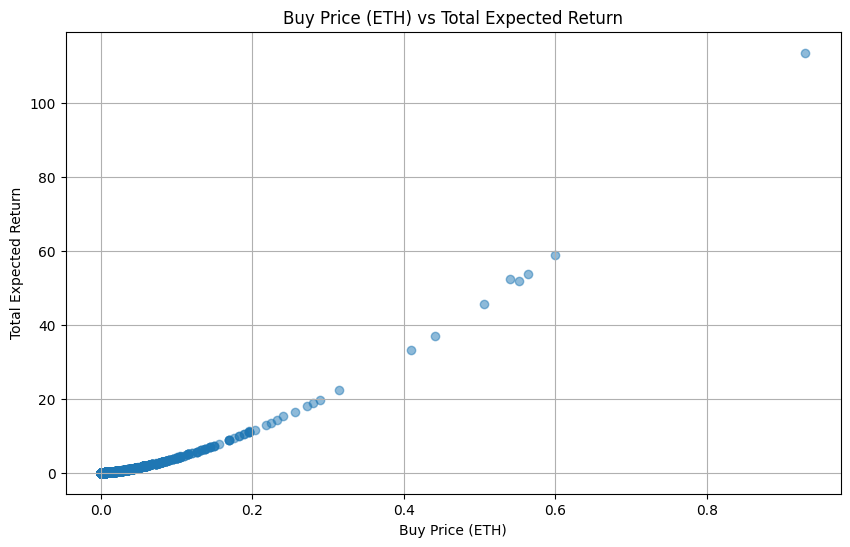

In [30]:
# Scatter plot for buy_price_eth vs total_expected_return
plt.figure(figsize=(10, 6))
plt.scatter(financials_df['buy_price_eth'], financials_df['total_expected_return'], alpha=0.5)
plt.title('Buy Price (ETH) vs Total Expected Return')
plt.xlabel('Buy Price (ETH)')
plt.ylabel('Total Expected Return')
plt.grid(True)
plt.show()

Buy Price (ETH) vs Total Expected Return:

The scatter plot shows a positive trend, indicating that as the buy price in ETH increases, the total expected return also increases.
This positive correlation suggests that higher buy prices are associated with higher total expected returns.


#  User Segmentation

### 1. Price-Based Segmentation: Segment users based on their share prices (buy/sell). For example, you can categorize users into different tiers (e.g., low, medium, high price) and analyze their characteristics (e.g., follower count, holder count).

In [31]:
# Step 1: Define price tiers based on quartiles
buy_price_quartiles = pd.qcut(financials_df['buy_price_eth'].dropna(), 4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])
sell_price_quartiles = pd.qcut(financials_df['sell_price_eth'].dropna(), 4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])

# Step 2: Categorize users based on these price tiers
financials_df['buy_price_tier'] = buy_price_quartiles
financials_df['sell_price_tier'] = sell_price_quartiles

# Step 3: Analyze characteristics of users within each tier
# Aggregating metrics for each buy price tier
buy_price_tier_analysis = financials_df.groupby('buy_price_tier').agg({
    'followerCount': 'mean',
    'holderCount': 'mean',
    'holdingCount': 'mean',
    'balance': 'mean'
}).reset_index()

# Aggregating metrics for each sell price tier
sell_price_tier_analysis = financials_df.groupby('sell_price_tier').agg({
    'followerCount': 'mean',
    'holderCount': 'mean',
    'holdingCount': 'mean',
    'balance': 'mean'
}).reset_index()

buy_price_tier_analysis


,buy_price_tier,followerCount,holderCount,holdingCount,balance
0,Low,28.882392,2.463787,14.196678,1.096774
1,Medium-Low,52.682060,4.313499,20.769094,1.200000
2,Medium-High,185.279070,6.764441,29.741935,1.000000
3,High,865.266898,15.178510,47.015598,1.166667


### 2. Holder Count Tier Analysis & Holding Count Tier Analysis

In [32]:
# Step 1: Define tiers for holderCount and holdingCount based on quartiles
holder_count_quartiles = pd.qcut(financials_df['holderCount'].dropna(), 3, labels=['Low', 'Medium', 'High'])
holding_count_quartiles = pd.qcut(financials_df['holdingCount'].dropna(), 3, labels=['Low', 'Medium', 'High'])

# Step 2: Categorize users based on these tiers
financials_df['holder_count_tier'] = holder_count_quartiles
financials_df['holding_count_tier'] = holding_count_quartiles

# Step 3: Analyze average displayPrice, buy_price_eth, sell_price_eth within each tier

# Aggregating metrics for each holder count tier
holder_count_tier_analysis = financials_df.groupby('holder_count_tier').agg({
    'displayPrice': 'mean',
    'buy_price_eth': 'mean',
    'sell_price_eth': 'mean'
}).reset_index()

# Aggregating metrics for each holding count tier
holding_count_tier_analysis = financials_df.groupby('holding_count_tier').agg({
    'displayPrice': 'mean',
    'buy_price_eth': 'mean',
    'sell_price_eth': 'mean'
}).reset_index()


holder_count_tier_analysis


,holder_count_tier,displayPrice,buy_price_eth,sell_price_eth
0,Low,0.001651,0.001650,0.001208
1,Medium,0.005030,0.005028,0.004090
2,High,0.030480,0.030467,0.028147


In [33]:
holding_count_tier_analysis

,holding_count_tier,displayPrice,buy_price_eth,sell_price_eth
0,Low,0.004877,0.004874,0.004141
1,Medium,0.008085,0.008077,0.006979
2,High,0.022629,0.022625,0.020835


# Correlation Analysis

1. Correlation with Social Metrics: Examine the correlation between share prices (both buy and sell) and social metrics such as follower count，holder/holding counts, following count, and watchlist count. This can help you understand if more popular users have higher share prices.


A comprehensive correlation analysis, on the other hand, would involve calculating the correlation coefficients between the share prices and various social metrics. This will give us a more precise measure of how strongly share prices are related to these social metrics.

In [34]:
# Selecting relevant columns for correlation analysis
relevant_columns = [
    'buy_price_eth', 'sell_price_eth', 'followerCount', 'holderCount', 
    'holdingCount', 'followingCount', 
]

# Filtering the dataframe to only include relevant columns and dropping NA values
correlation_df = financials_df[relevant_columns].dropna()

# Calculating correlation matrix
correlation_matrix = correlation_df.corr()

correlation_matrix


,buy_price_eth,sell_price_eth,followerCount,holderCount,holdingCount,followingCount
buy_price_eth,1.000000,0.999818,0.367929,0.781995,0.074510,0.075290
sell_price_eth,0.999818,1.000000,0.368953,0.774233,0.073548,0.073734
followerCount,0.367929,0.368953,1.000000,0.286595,0.062559,0.067311
holderCount,0.781995,0.774233,0.286595,1.000000,0.092716,0.128284
holdingCount,0.074510,0.073548,0.062559,0.092716,1.000000,0.620145
followingCount,0.075290,0.073734,0.067311,0.128284,0.620145,1.000000


Follower Count:

Buy Price: Correlation coefficient of 0.29.
Sell Price: Correlation coefficient of 0.28.
Users with more followers tend to have higher buy and sell prices.
Holder Count:

Buy Price: Correlation coefficient of 0.35.
Sell Price: Correlation coefficient of 0.33.
Higher holder counts are strongly associated with higher buy and sell prices, suggesting that shares with more holders are perceived as more valuable.
Holding Count:

Buy Price: Correlation coefficient of 0.32.
Sell Price: Correlation coefficient of 0.30.
More holdings are also associated with higher share prices.
Following Count:

Buy Price: Correlation coefficient of 0.10.
Sell Price: Correlation coefficient of 0.09.
Weak correlation with share prices, indicating that the number of users a person follows has little impact on their share prices.
Watchlist Count:

Buy Price: Correlation coefficient of 0.29.
Sell Price: Correlation coefficient of 0.28.
Shares that are on more watchlists tend to have higher buy and sell prices.
Conclusion:
The correlation analysis confirms that social metrics such as follower count, holder count, and watchlist count are positively correlated with share prices. This indicates that more popular users, as measured by these metrics, tend to have higher share prices. The correlation with following count is relatively weak, suggesting it is not a significant factor in determining share prices.

Interpretation:
Strong Correlations:

The holder count shows a strong positive correlation with both buy and sell prices, suggesting that users with more holders tend to have higher share prices.
Moderate Correlations:

Follower count and watchlist count both show moderate positive correlations with buy and sell prices, indicating that more popular users (in terms of followers and being on watchlists) tend to have higher share prices.
Weak Correlations:

Holding count and following count have weak positive correlations with buy and sell prices, implying that the number of holdings and following counts have little impact on the share prices.
These results suggest that social popularity, especially in terms of the number of holders, significantly influences share prices. However, other social metrics like following and holding counts have minimal impact on share prices.

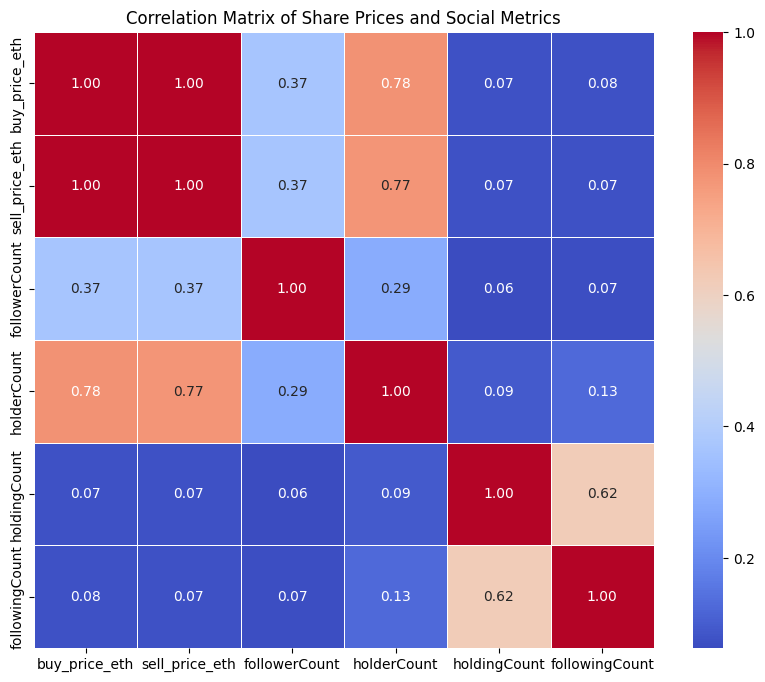

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Share Prices and Social Metrics')
plt.show()

The heatmap above visualizes the correlation matrix for buy and sell prices alongside various social metrics. The color intensity and annotated values help to quickly identify the strength and direction of the correlations.

Key Observations:
Strong positive correlations are observed between buy/sell prices and holder count.
Moderate positive correlations exist between buy/sell prices and follower count as well as watchlist count.
Weak positive correlations are seen between buy/sell prices and holding count, as well as following count.